In [26]:
library(tidyverse)
library(scales)
library(magrittr)
options(repr.plot.width=20, repr.plot.height=20)

param_plot = function(dfx, param) {
    dfx %>% ggplot2::ggplot(aes(x = !!rlang::sym(param), y = FE_pct, col = Eval)) +
    ggplot2::geom_point() + 
    ggplot2::geom_line(alpha = 0.4) + facet_wrap( ~ N) + 
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
    ylim(0, 1.2) +
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        strip.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold")
    )   + theme_bw()
}


In [30]:
# LAMBDA

lambda_df = 
    readr::read_csv("../param-exps/data/new-crit/lambda-experiments.csv") %>%
    dplyr::group_by(N, Eval, lambda) %>%
    dplyr::summarize(FE_ave = mean(FE)) %>% 
    dplyr::mutate(FE_pct = FE_ave / (10000 * N)) %>%
    dplyr::ungroup()


── Column specification ────────────────────────────────────────────────────────
cols(
  FE = col_double(),
  N = col_double(),
  Eval = col_character(),
  lambda = col_double(),
  Iteration = col_double(),
  Alg = col_character()
)


`summarise()` regrouping output by 'N', 'Eval' (override with `.groups` argument)



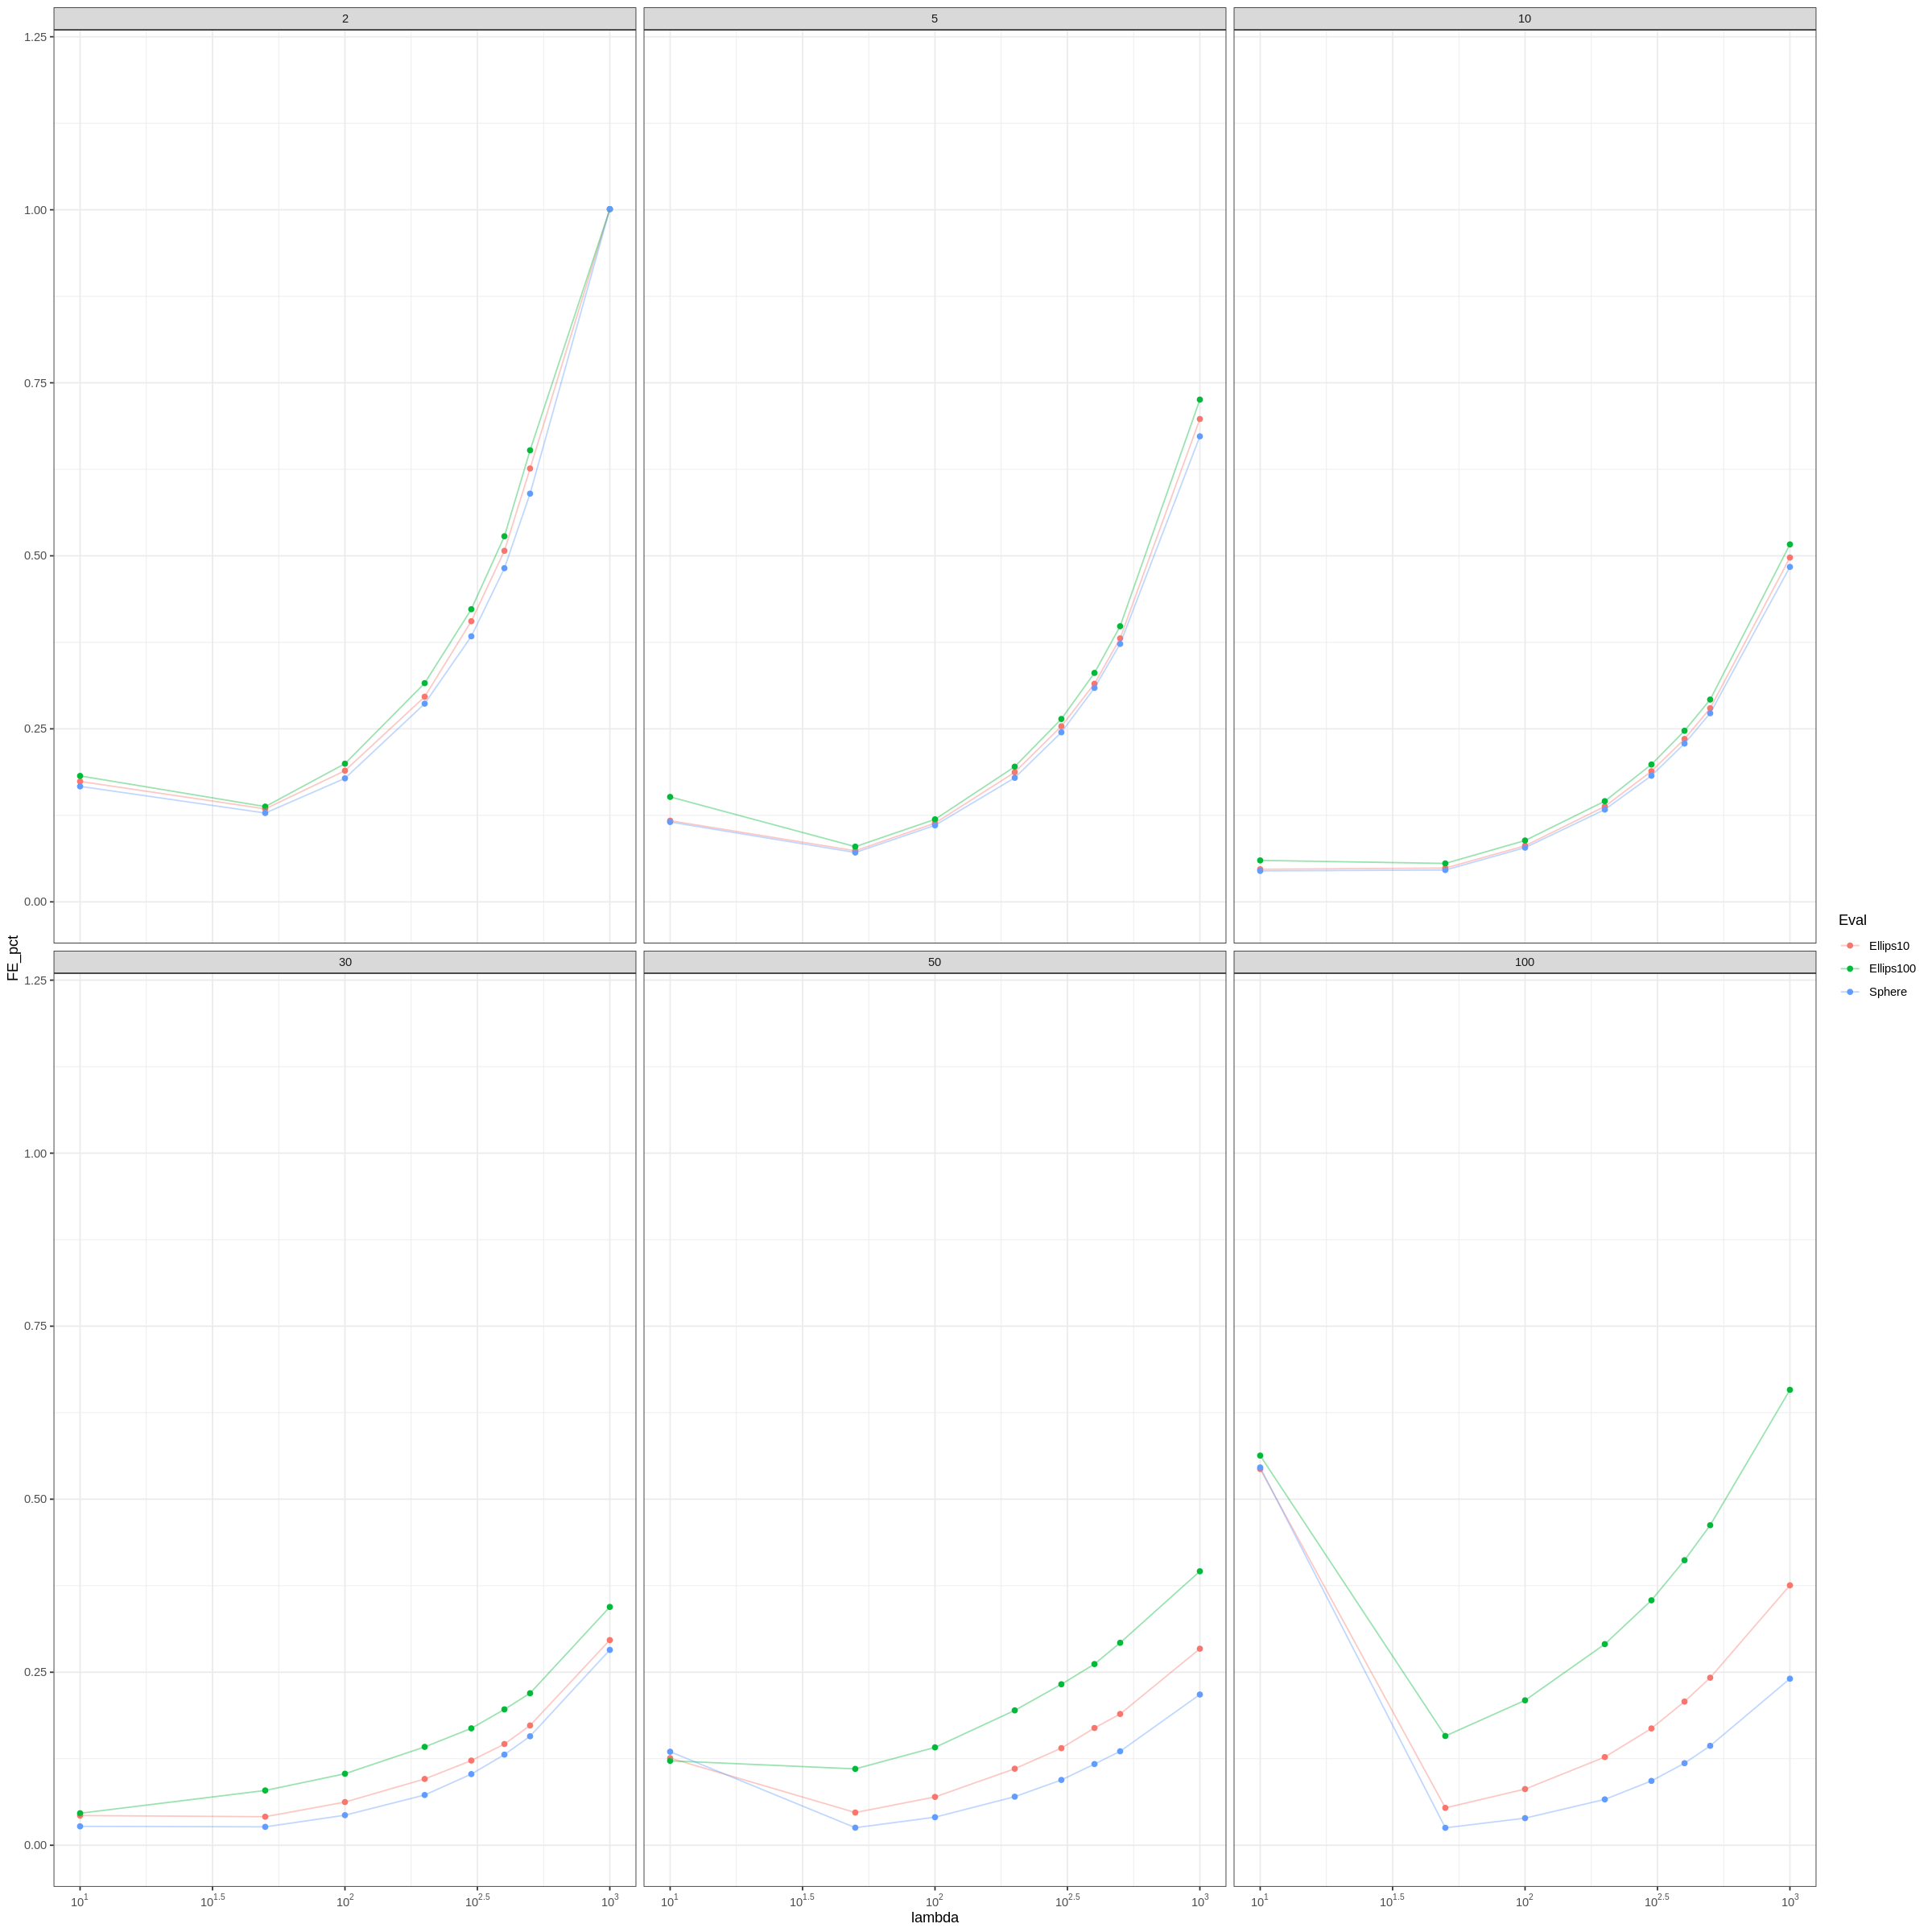

In [31]:
lambda_df %>% param_plot("lambda")

In [33]:
# SIGMA

sigma_df = 
    readr::read_csv("../param-exps/data/new-crit/sigma-experiments.csv") %>%
    dplyr::group_by(N, Eval, sigma) %>%
    dplyr::summarize(FE_ave = mean(FE)) %>% 
    dplyr::mutate(FE_pct = FE_ave / (10000 * N)) %>%
    dplyr::ungroup()


── Column specification ────────────────────────────────────────────────────────
cols(
  FE = col_double(),
  N = col_double(),
  Eval = col_character(),
  sigma = col_double(),
  Iteration = col_double(),
  Alg = col_character()
)


`summarise()` regrouping output by 'N', 'Eval' (override with `.groups` argument)



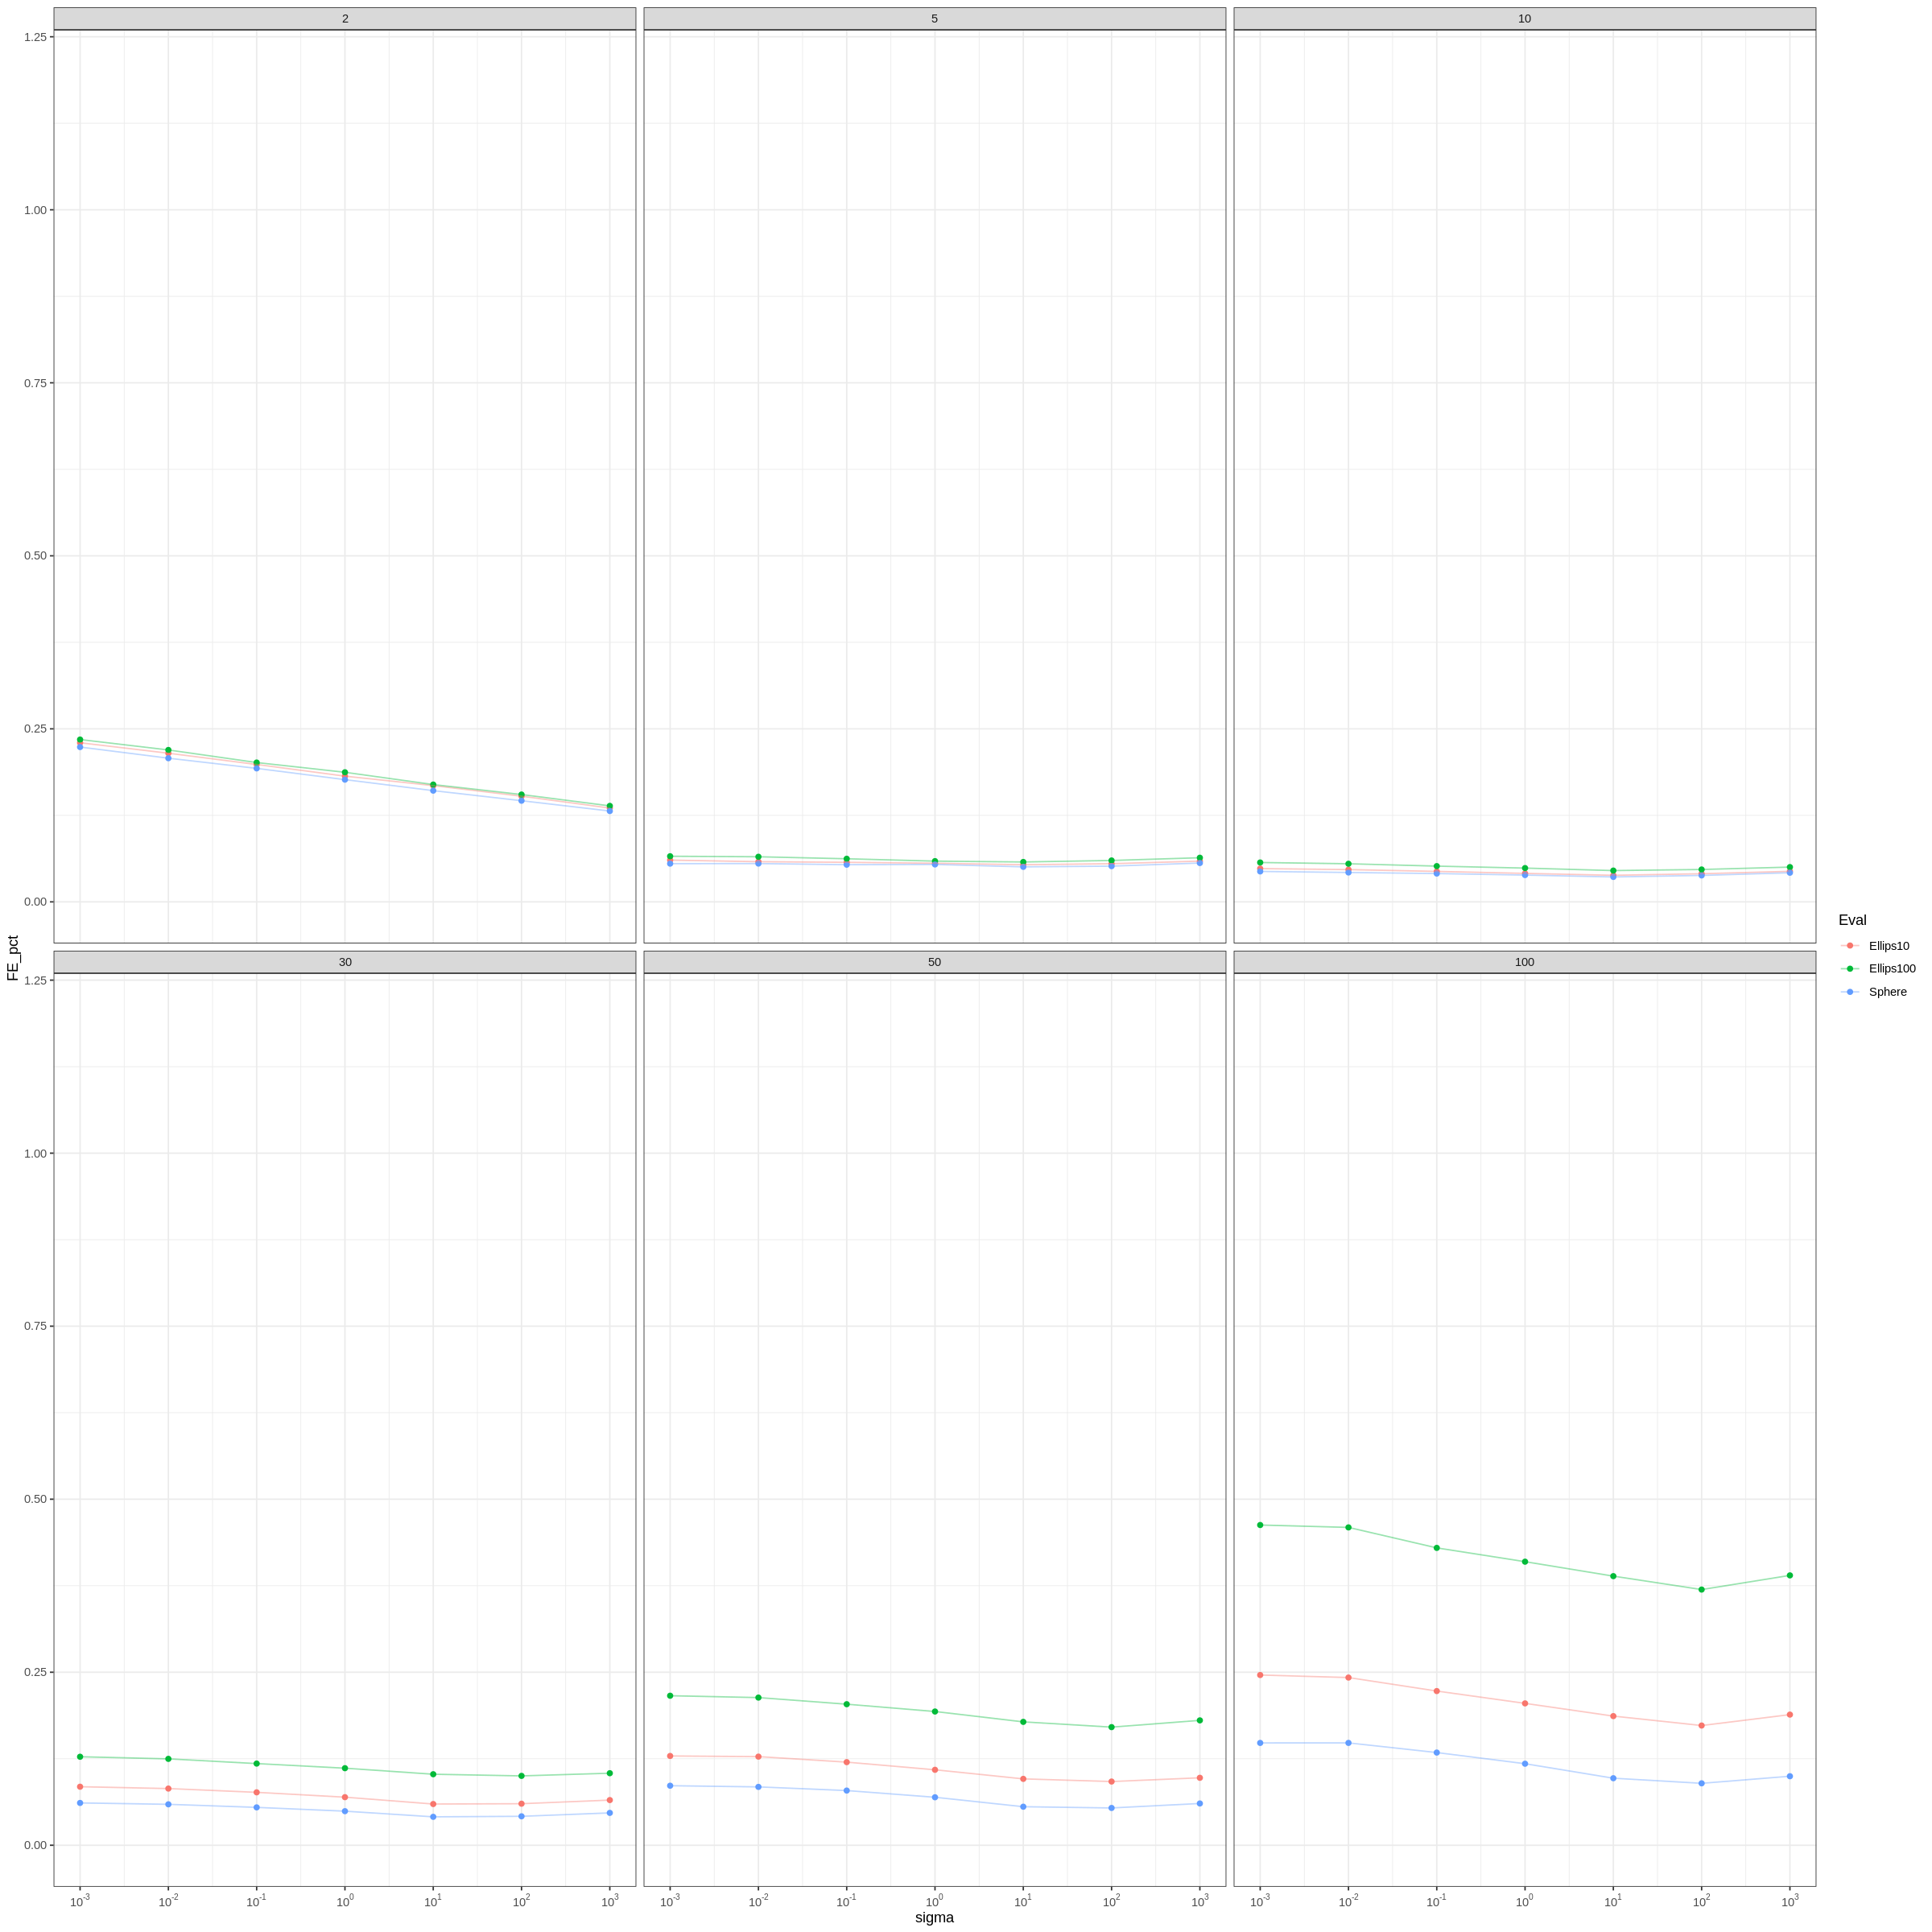

In [34]:
sigma_df %>% param_plot("sigma")